In [1]:
import numpy as py
import random as random
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import t
import math


from Coord import *
from Submarine import *
from Merchant_Ship import Merchant_Ship

In [2]:
t = py.linspace(0,100, num = 1000)

In [3]:
def generate_objects(n_merch,n_tgts,n_subs,speed_sub):
    '''Generates a requested number of merchants, targets, and submarines. Submarine speed may be specified.'''
    
    # Target name builder
    tgt_name = 'Target_'
    tgt_names = []
    for i in range(1,n_tgts+1):
        tgt_names.append(tgt_name + str(i))
        
    # Target builder
    Targets = []
    for i in tgt_names:
        Targets.append(Merchant_Ship(i, Coord(random.uniform(0,100),random.uniform(0,100))))
        
    # Merchant name builder
    merch_name = 'Merchant_'
    merch_names = []
    for i in range(1,n_merch+1):
        merch_names.append(merch_name + str(i))
        
    # Merchant builder
    Merchants = []
    for j in merch_names:
        Merchants.append(Merchant_Ship(j, Coord(random.uniform(0,100),random.uniform(0,100))))
   
    # Submarine name builder
    sub_name = 'Hunter_'
    sub_names = []
    for i in range(1,n_subs+1):
        sub_names.append(sub_name + str(i))
        
    # Submarine builder
    Submarines = []
    for i in sub_names:
        Submarines.append(Submarine(Coord(random.uniform(0,100),100),crs = round(random.random())*180, spd = speed_sub))
        
    return Targets,Merchants,Submarines


In [4]:
def contact_picture(tgt_list,merch_list,sub_list):
    '''Plots contact picture'''
    
    # Targets 
    for item_t in tgt_list:
        plt.plot(item_t.loc.lon,item_t.loc.lat, 'ro')
        
    # Merchants   
    for item_m in merch_list:
        plt.plot(item_m.loc.lon,item_m.loc.lat, 'bo')
    
    # Submarines
    for item_s in sub_list:
        plt.plot(item_s.loc.lon,item_s.loc.lat, 'go')

    plt.xlim(0,200)
    plt.ylim(0,100)

In [5]:
#Targets, Merchants, Submarines = generate_objects(2,3,1)

In [6]:
#contact_picture(Targets,Merchants,Submarines)

In [7]:
def Simulator(n_targets,n_merchants,n_submarines,speed_sub,plotter = True):
    '''Performs one simulation of a submarine tracking event'''
    
    # Generate enviroment objects
    Targets, Merchants, Submarines = generate_objects(n_merchants,n_targets,n_submarines,speed_sub)
    
    # Working indexes
    plotter_index = 0
    max_timer = 0
    
    # Clear any existing plots
    plt.clf()
    
    
    while Submarines[0].loc.lon <= 200:
        '''Simulate only as long as submarine is within boundary'''
        
        # Update postion of eviroment objects 
        target_list = Targets + Merchants
        for item_m in Merchants:
            item_m.update_position()

        for item_t in Targets:
            item_t.update_position()

        for item_s in Submarines:
            item_s.update_position()
            item_s.ping(target_list)

        plotter_index += 1

        # Plotting only occurs once in 800 steps. Set to improve visual clarity and runtime
        if plotter_index > 800:
            plotter_index = 0
            if plotter == True:
                contact_picture(Targets,Merchants,Submarines)
        
        # Ensure if no detections occurs that simulation will halt
        max_timer += 1
        if max_timer > 1e5:
            break

    return Targets,Merchants,Submarines


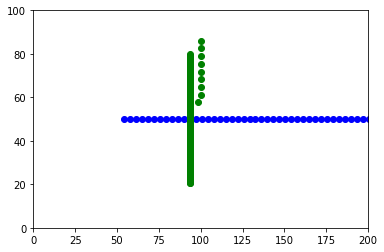

In [29]:
Targets, Merchants, Submarines = Simulator(0,1,1,16,True)

In [9]:
Submarines[0].detected_before


['Target_2']

In [10]:
### Barrier test 

In [ ]:
# Loops created to run nreps of a simulation for each max_speed/nreps increment and count detections.
# For use in evaluating performance with respect to existing models. 

nreps = 500
dspeed = 30
max_speed = 30
speed = 0

Detection_History = []
for item in range (0,nreps):
    Detection_History.append([0]*nreps)

for i in range(0,nreps):
    for j in range(0,nreps):
        Targets, Merchants, Submarines = Simulator(1,0,1,speed,False)
        test = Submarines[0].detected_before
        if len(test) > 0:
            Detection_History[i][j] = 1
        else:
            Detection_History[i][j] = 0
    speed += max_speed/nreps
    print('Row %d done' % (i))

Row 0 done
Row 1 done
Row 2 done
Row 3 done
Row 4 done
Row 5 done
Row 6 done
Row 7 done
Row 8 done
Row 9 done
Row 10 done
Row 11 done
Row 12 done
Row 13 done
Row 14 done
Row 15 done
Row 16 done
Row 17 done
Row 18 done
Row 19 done
Row 20 done
Row 21 done
Row 22 done
Row 23 done
Row 24 done
Row 25 done
Row 26 done
Row 27 done
Row 28 done
Row 29 done
Row 30 done
Row 31 done
Row 32 done
Row 33 done
Row 34 done
Row 35 done
Row 36 done
Row 37 done
Row 38 done
Row 39 done
Row 40 done
Row 41 done
Row 42 done
Row 43 done
Row 44 done
Row 45 done
Row 46 done
Row 47 done
Row 48 done
Row 49 done
Row 50 done
Row 51 done
Row 52 done
Row 53 done
Row 54 done
Row 55 done
Row 56 done
Row 57 done
Row 58 done
Row 59 done
Row 60 done
Row 61 done
Row 62 done
Row 63 done
Row 64 done
Row 65 done
Row 66 done
Row 67 done
Row 68 done
Row 69 done
Row 70 done
Row 71 done
Row 72 done
Row 73 done
Row 74 done
Row 75 done
Row 76 done
Row 77 done
Row 78 done
Row 79 done
Row 80 done
Row 81 done
Row 82 done
Row 83 done
Ro

In [ ]:
Detection_History = pd.DataFrame(Detection_History)

In [ ]:
Detection_History.sum(axis = 1).plot()



In [ ]:
Detection_History.to_csv('tests1.csv')

In [ ]:
#### ignore the next few lines

In [ ]:
#T = Detection_History.sum(axis = 1)/nreps

In [ ]:
#Tstd = Detection_History.std(axis =1)

In [ ]:
#lower_cutoff = t.ppf(0.025, 500 - 1, loc = T, scale = Tstd)

In [ ]:
#lc = pd.DataFrame(lower_cutoff)

In [ ]:
#### unignore 

In [ ]:
def Wagner(v, L=100,R=20,u=16):
    '''Function to plot Wagner et al 1999 barrier search detection probability'''
    
    if R*v <= u*math.sqrt(L*(L-2*R)**2):
        P_d = 1 - ((L/R - math.sqrt((v/u)**2 + 1)-1)**2)*((R**2)/(L*(L-2*R)))
    else:
        P_d = 1
        
    return P_d
    

In [ ]:
def Sozen(v, L=100,R=20,u=16):
    '''Function to plot Sozen et al 2016 barrier search detection probability'''
    if (R*v**2)/((L-2*R)*u*math.sqrt(u**2 + v**2)) < 1:
        P_d = 2*R*math.sqrt((v/u)**2 + 1)/L + (R**2)*v*(math.pi/2 - math.atan(u/(v+0.001)) - v/u)/((L-2*R)*u*L)
    else:
        P_d = 1 + (R**2)*v*math.asin((L-2*R)*u/(R*v))/((L-2*R)*u*L) - 2*R/L + math.sqrt((R**2)*(v**2) - ((L-2*R)**2)*(u**2))/(L*v)
    
    return P_d

In [ ]:
T = Detection_History.sum(axis = 1)/nreps
T = T.to_frame()
T['Speed'] = py.linspace(0,max_speed,num = nreps)

In [ ]:
T['Wagner'] = T['Speed'].apply(Wagner)
T['Sozen'] = T['Speed'].apply(Sozen)

In [ ]:
T = T.rename(columns = {0: 'P_d'})

In [ ]:
T.plot(x = 'Speed')